## Introduction du notebook

Nous sommes plusieurs petites équipes de Développeurs en IA, avec plusieurs projets proposés par notre instructeur !    


Notre équipe est chargée de créer un model IA capable de détecter les SPAM dans les Email, qu'elle puisse différencier ceux qui le sont avec ceux qui ne le sont pas, grâce à la méthode du NLP (Natural Langage processing)  

Le **NLP** est une technologie d’intelligence artificielle visant à permettre aux ordinateurs de comprendre le langage humain.
L’objectif de cette technologie est de permettre aux machines de lire, de déchiffrer, de comprendre et de donner sens au langage humain.  

Il existe une version de notre projet où notre modèle utilise une méthode en Deep Learning, notamment une couche **d'Embedding**. Il s'agit d'un espace dit "peu dimensionnel" dans lequel nous pouvons traduire des vecteurs à haute dimension. Cela facilite l'apprentissage automatique de notre IA sur des entrées de grande taille. L'avantage de ce modèle est qu'il pourra apprendre et être réutilisé dans plusieurs modèles (donc sur d'autres jeux de données). 

Le projet présenté ici est finalement celui qui est pour le moment retenu car il a été plus simple de le développer et d'en faire l'interface utilisateur voulue par l'équipe !  

Nous retrouvons des méthodes en Machine Learning, notamment **TfidfVectorizer** de **Scikit-learn**, qui permet de revectoriser nos données.  

Au préalable, les données ont été nettoyées et passées sous **NLTK** pour qu'il identifie les mots anglais. Nous avons ensuite utilisé la technique **Lemmatizer** avec **WordNetLemmatizer()**. La lemmatisation est le processus de regroupement des différentes formes fléchies d'un mot afin qu'elles puissent être analysées comme un seul élément. La lemmatisation est similaire à la radicalisation mais elle apporte un contexte aux mots.  

C'est ainsi que nous avons pu obtenir notre corpus de mots que nous donnons à notre modèle pour qu'il puisse s'entraîner.  

Pour notre projet nous avons à notre disposition une base de données comportant des mails, classé par 1 ou 0.  
* 0 sont les mail non-spam.  
* 1 sont les mail considérés comme des spam.  

Dans ce notebook protocole/predict, vous pourrez suivre les étapes (Step by steps) pour pouvoir utiliser notre modèle avec différentes données.  

Allons-y !  

## Explication step by step

### Import the libraries that are recquired for our model

In [25]:
###### FIRST CELL TO EXECUTE : Importing libraries ######

#basic
import pandas as pd
import numpy as np
import string
import pickle

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#nltk (cleaning text)
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

#modeling
import lightgbm as lgb

#result
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

import warnings
warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Import pickle, model and your dataset

In [26]:
###### SECOND CELL TO EXECUTE : Importing data that you wan to test ######

# Here, you need to replace the string 'PATHNAME_OF_YOUR_DATA_FILE' by the pathname of your file
# For example : model_df = pd.read_csv('data/eda_clean_df.csv')
# model_df = pd.read_csv('PATHNAME_OF_YOUR_DATA_FILE')

df = pd.read_csv('data/spam_newcol.csv')

In [27]:
# After you need Importing our trained model
# Here, you need to use the file "model.h5" (or "model.pkl" for model's pickle) that you will find here :
# https://github.com/Melodyellinn/Projet_NLP

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))
corpus = pickle.load(open('corpus.pkl', 'rb'))

In [28]:
# ##### Execute this cell for apply TFIDFVectorizer ##### #

def transform_text(text):
    tfidf = TfidfVectorizer(ngram_range=(1, 3))
    X = tfidf.fit_transform(corpus)
    y = df["CATEGORY"]
    return corpus

In [29]:
# ##### Execute this cell for use model.predict with LightGBM_Model ##### #

lgb.LGBMClassifier(model.predict(X_test))

LGBMClassifier(boosting_type=array([1, 1, 0, ..., 0, 0, 1], dtype=int64))

Accuracy Score Model : 0.9879310344827587
Precision Score Model : 0.9723756906077348
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       798
           1       0.99      0.97      0.98       362

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.99      1160
weighted avg       0.99      0.99      0.99      1160

----------------------------------------------------------------------------------
Accuracy of LightGBM Model: 98.79310344827587 %


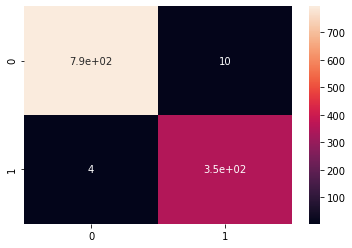

In [30]:
# ##### Finaly, print your results ! ##### #

# Result : Accuracy, Precision and Confusion Matrix of Model
acc = accuracy_score(y_pred, y_test)
print('Accuracy Score Model :', accuracy_score(y_pred, y_test))
print('Precision Score Model :', precision_score(y_pred, y_test))
print("----------------------------------------------------------------------------------")
report = classification_report(y_test, y_pred)
print(report)
print("----------------------------------------------------------------------------------")
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")
plt.show()

In [31]:
# ##### result's predictions ##### #
my_prediction = model.predict(X_test)
print(my_prediction)

[1 1 0 ... 0 0 1]
